**Analysis of HG Product 1,2,3 Data Set**

- Analysis Goals = Does the % of Sales of Product 3 (Normalized for all products sold in that country) Predict the % that product 1
has a advantage or disadvange over product 2 (all normalized by all product sold in that country)

In [251]:
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [252]:
# Import the pandas package
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/alexb/HG.csv')

In [253]:
df = df.drop(1)
df.head()

,Country,R123,R231,R321
0,United States,0.0420,0.0587,5.8136
2,Canada,0.0327,0.0445,7.7633
3,India,0.0204,0.0462,8.3904
4,Australia,0.0937,0.0504,4.7684
5,France,0.0257,0.0451,8.1534


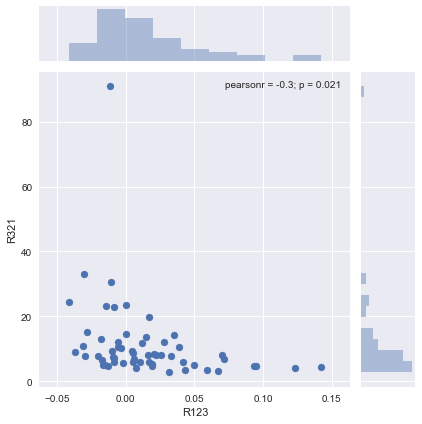

In [254]:
sns.jointplot(x="R123", y="R321", data=df);

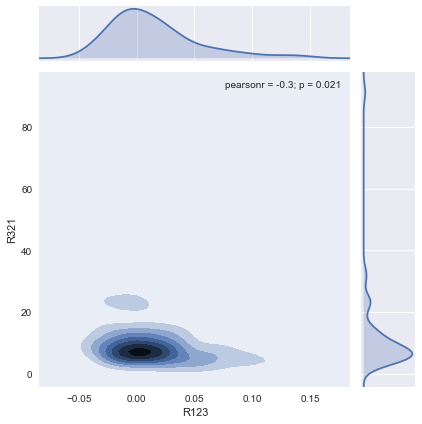

In [255]:
sns.jointplot(x="R123", y="R321", data=df, kind="kde");

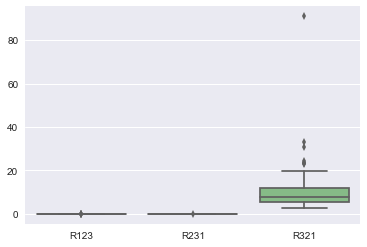

In [256]:
sns.boxplot(data=df, palette="PRGn")

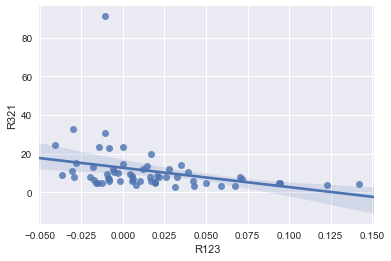

In [257]:
sns.regplot(x="R123", y="R321", data=df);

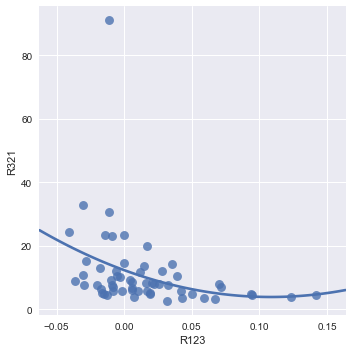

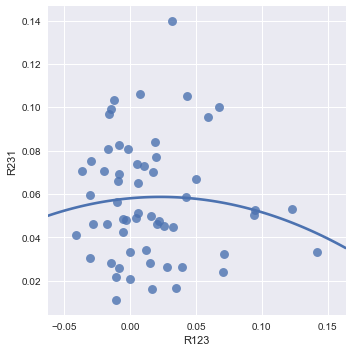

In [258]:
sns.lmplot(x="R123", y="R321", data=df, order=2, ci=None, scatter_kws={"s": 80});
sns.lmplot(x="R123", y="R231", data=df, order=2, ci=None, scatter_kws={"s": 80});

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

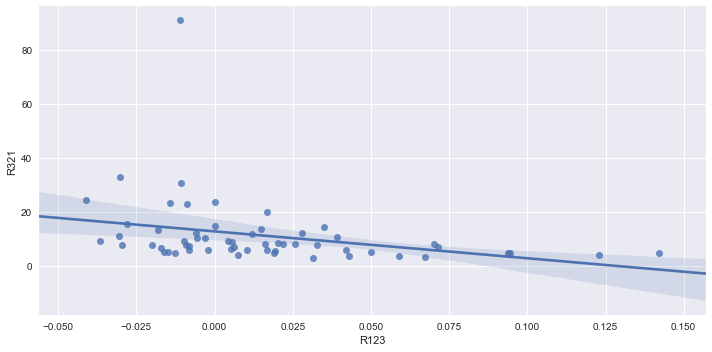

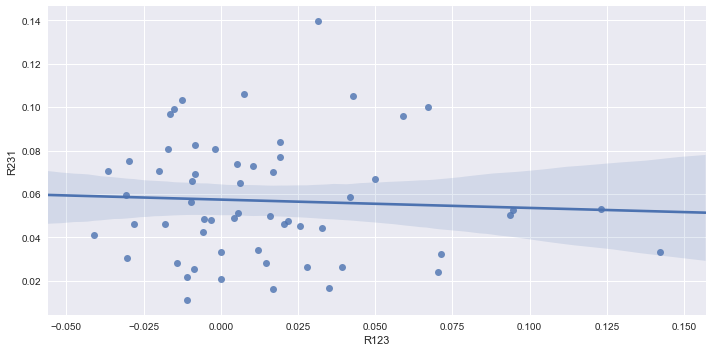

In [259]:
sns.lmplot(x="R123", y="R321", data=df, aspect=2);
sns.lmplot(x="R123", y="R231", data=df, aspect=2);

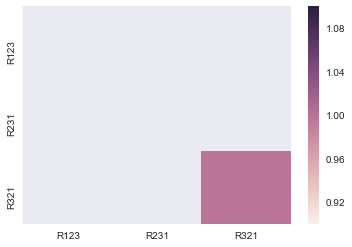

In [273]:
sns.heatmap(df.corr())

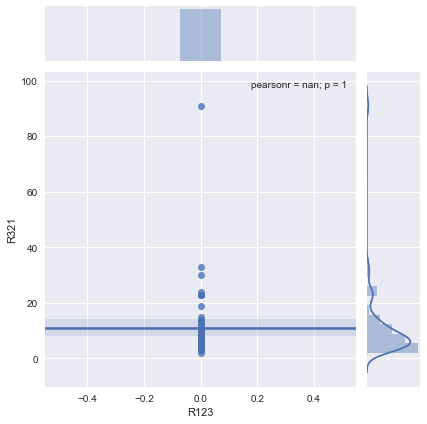

In [276]:
sns.jointplot('R123', 'R321', df, kind='reg');

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.



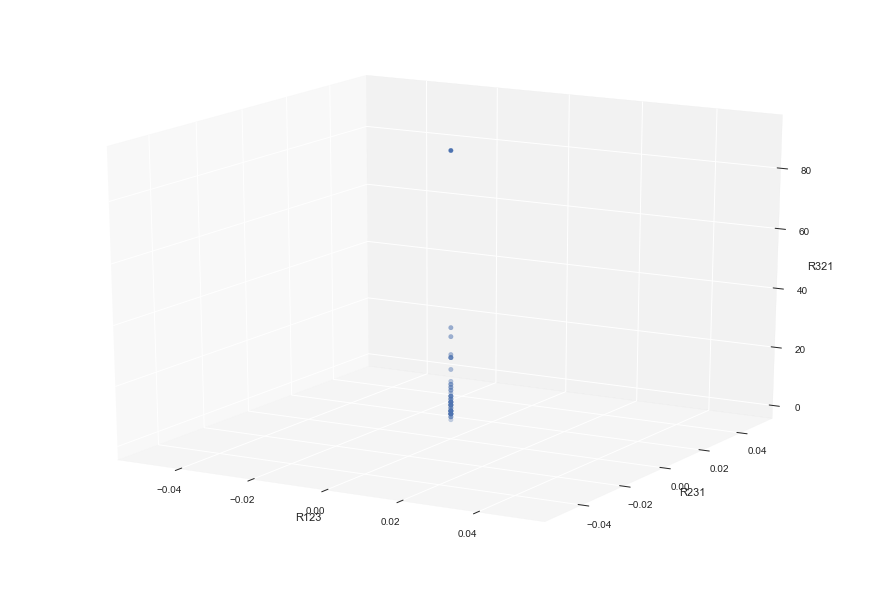

In [280]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-60, elev=18)
ax.scatter(df['R123'], df['R231'], df['R321'])
ax.set_xlabel('R123')
ax.set_ylabel('R231')
ax.set_zlabel('R321')
ax.set_axis_bgcolor('white')

In [260]:
df.head()
df.describe()

,R123,R231,R321
count,58.000000,58.000000,58.000000
mean,0.014698,0.056809,11.267638
std,0.038187,0.027572,12.587218
min,-0.041100,0.011000,2.728600
25%,-0.010625,0.033475,5.404525
50%,0.005900,0.050900,7.947950
75%,0.030500,0.073675,11.982150
max,0.142100,0.139700,91.000000


In [261]:
df.drop(['Country'], axis = 1, inplace = True)
df.head()

,R123,R231,R321
0,0.0420,0.0587,5.8136
2,0.0327,0.0445,7.7633
3,0.0204,0.0462,8.3904
4,0.0937,0.0504,4.7684
5,0.0257,0.0451,8.1534


In [262]:
df = df.astype(int)
df.dropna(inplace=True)
df.dtypes

R123    int32
R231    int32
R321    int32
dtype: object

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 58
Data columns (total 3 columns):
R123    58 non-null int32
R231    58 non-null int32
R321    58 non-null int32
dtypes: int32(3)
memory usage: 1.1 KB


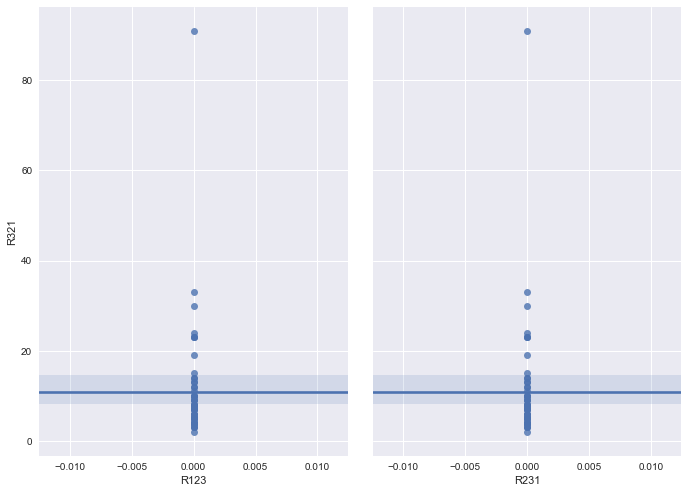

In [271]:
sns.pairplot(df, x_vars=['R123','R231'], y_vars='R321',size=7,aspect=0.7,kind='reg')

**Logistic Regression**

Test : predict R123(Prod 1 Strength Norm) using R213 ( Prod 2 Strength Norm) and R321 ( Prod 3 % size norm to 1+2)